# Heart Attack Predicting Projcet

## Problem definition: To predict whether the patients does come heart attack or not

### Features:
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

n

## Data Exploration:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("C:/New folder/Data sets/heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: title={'center': 'Age of Patients'}, xlabel='age', ylabel='count'>

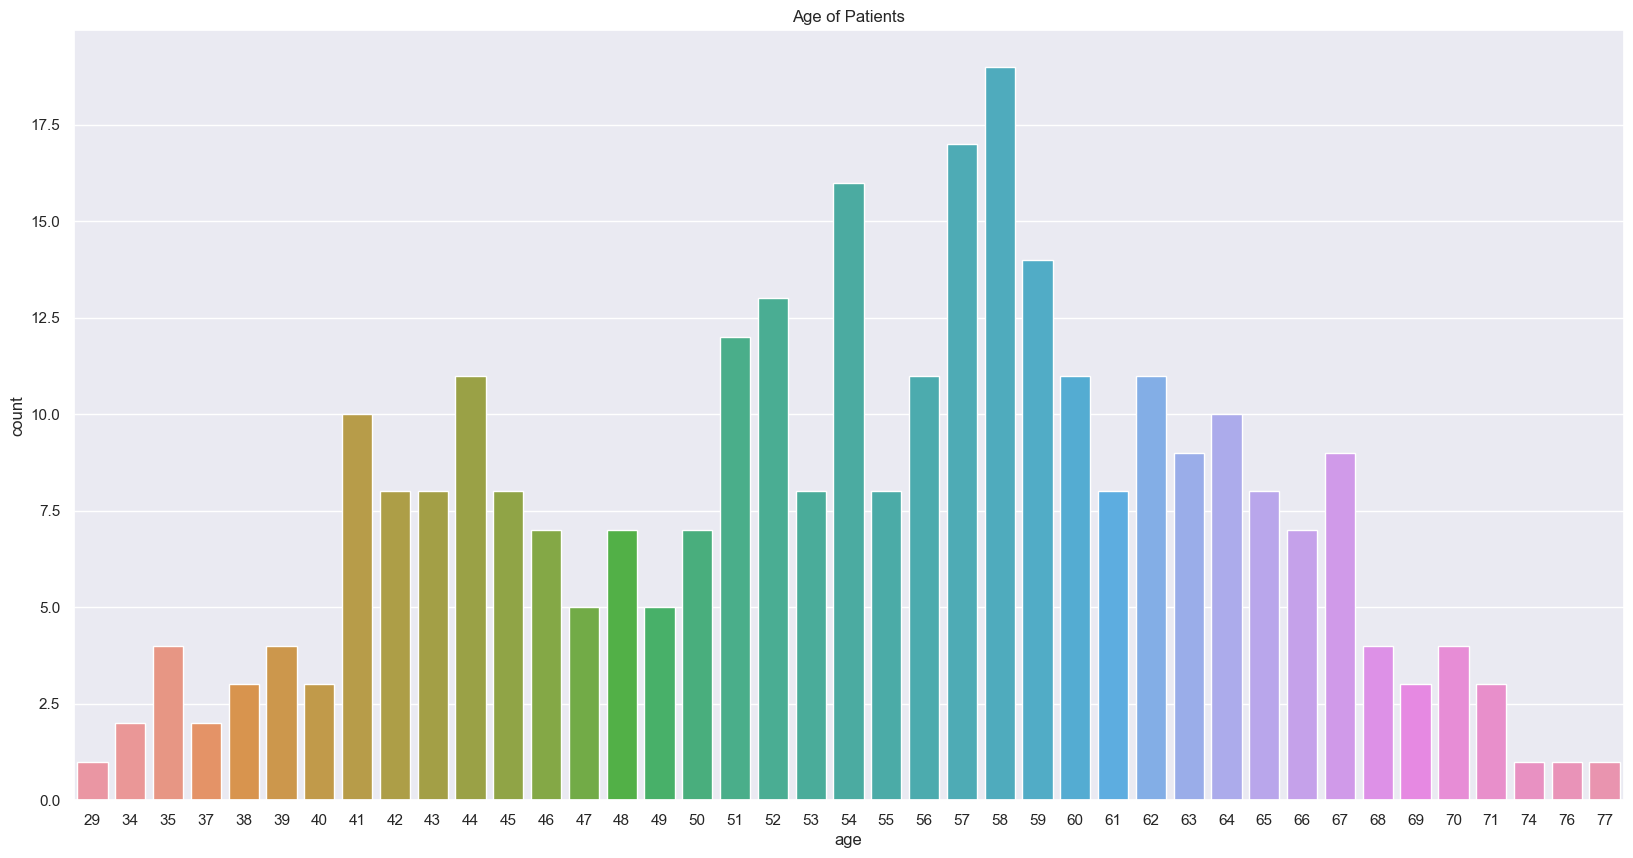

In [6]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

As we can see the Patients are of Age Group 51-67years in majority high 

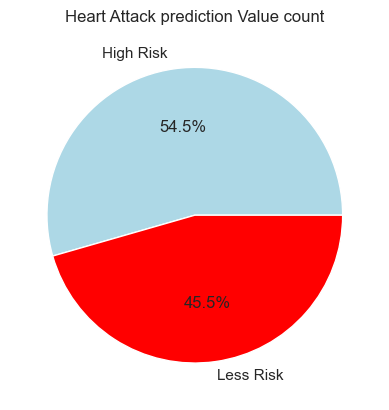

In [7]:
counts = df['output'].value_counts()
labels = ['High Risk ', 'Less Risk']
colors = ['lightblue', 'Red']
plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title("Heart Attack prediction Value count")
plt.show()

around 54.5 % of the patients in the dataset have chances of heart attack  

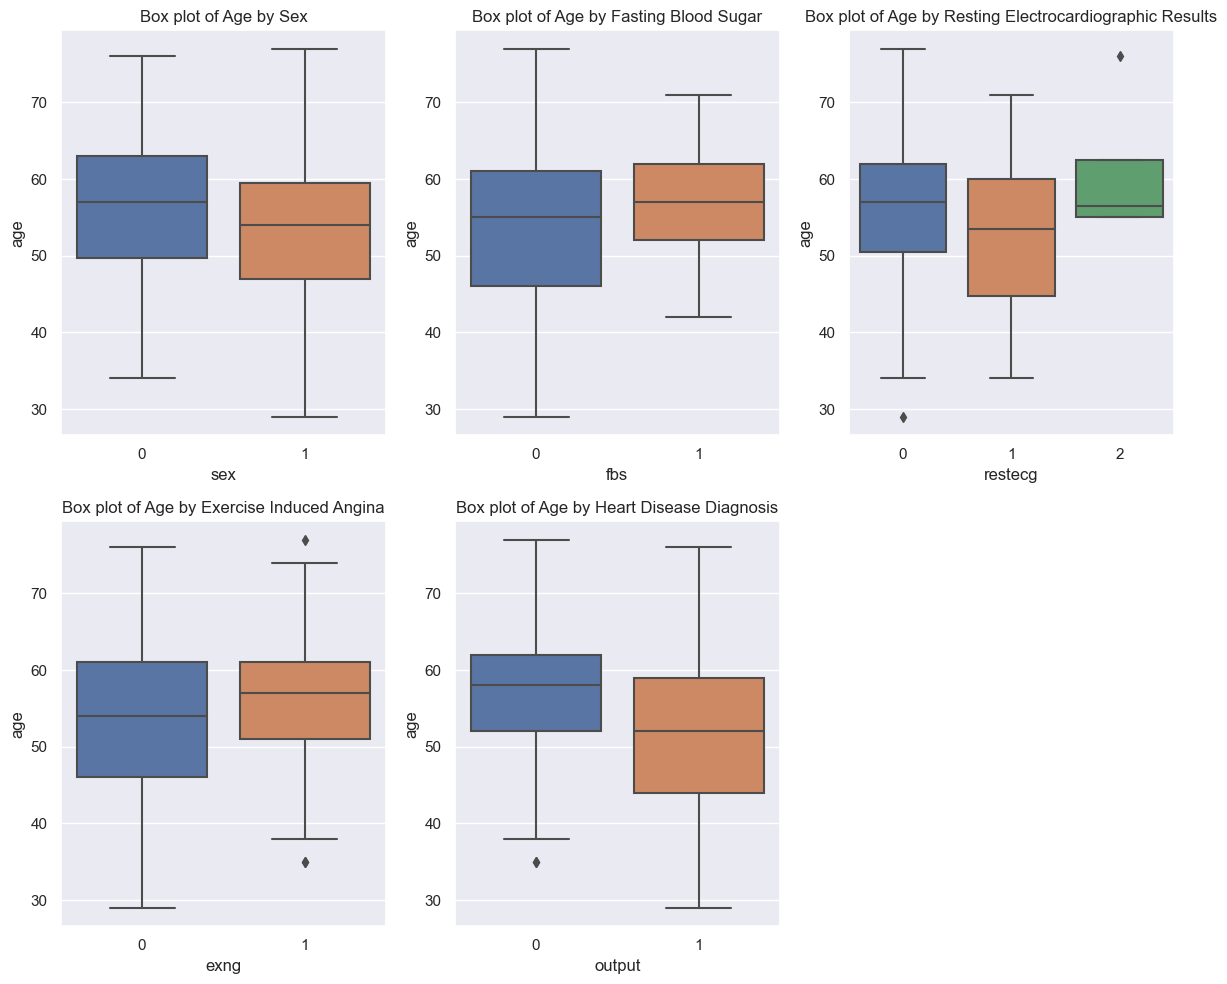

In [8]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 3, 1)  
sns.boxplot(x='sex', y='age', data=df)
plt.title('Box plot of Age by Sex')
plt.subplot(2, 3, 2)  
sns.boxplot(x='fbs', y='age', data=df)
plt.title('Box plot of Age by Fasting Blood Sugar')
plt.subplot(2, 3, 3)  
sns.boxplot(x='restecg', y='age', data=df)
plt.title('Box plot of Age by Resting Electrocardiographic Results')
plt.subplot(2, 3, 4) 
sns.boxplot(x='exng', y='age', data=df)
plt.title('Box plot of Age by Exercise Induced Angina')
plt.subplot(2, 3, 5)
sns.boxplot(x='output', y='age', data=df)
plt.title('Box plot of Age by Heart Disease Diagnosis')
plt.tight_layout()
plt.show()

shows that the median 0(male) compaired to  1(female)is high , IQR is same 

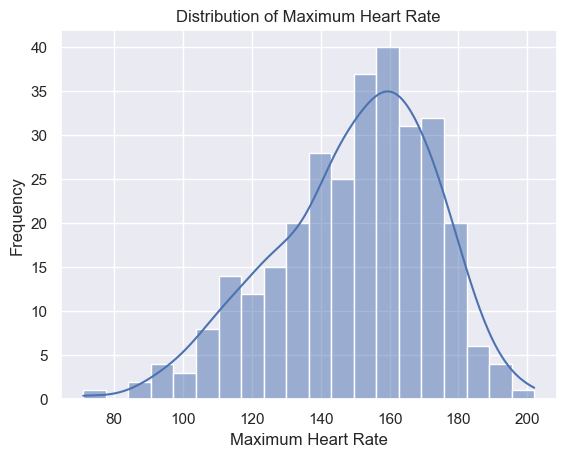

In [9]:
sns.histplot(df['thalachh'],bins=20, kde=True)
plt.title('Distribution of Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

So we can see in above their is 160 is the maximum Heart rate 

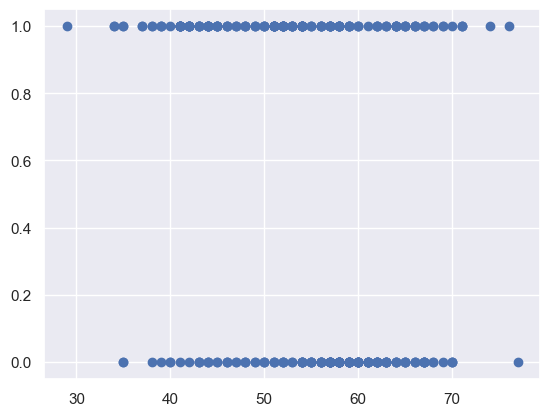

In [10]:
plt.scatter(df.age, df.output)

This is used for the Logistic regression 

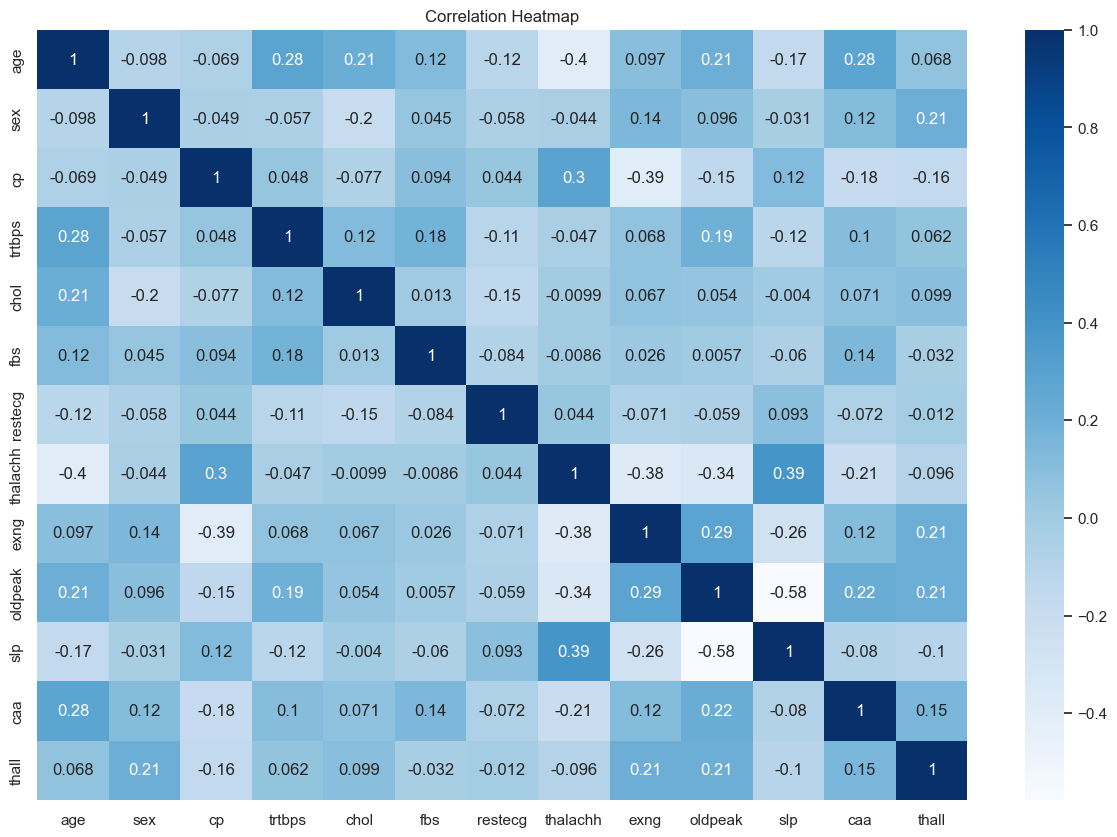

In [11]:
data = df.drop("output",axis=1)
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

in above diagram we  can see the thalachh have corelation 0.39 and slp highly corelated to the 

Count of female in 'sex' column: 96
Count of male in 'sex' column: 207


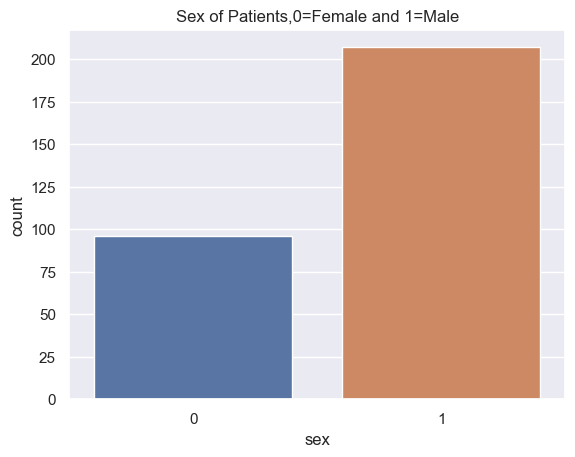

In [12]:
plt.title("Sex of Patients,0=Female and 1=Male")
sns.countplot(x='sex',data=df)
count_0 = df['sex'].value_counts()[0]
print("Count of female in 'sex' column:", count_0)
count_1 = df['sex'].value_counts()[1]
print("Count of male in 'sex' column:", count_1)

Count of male is high copare to female 

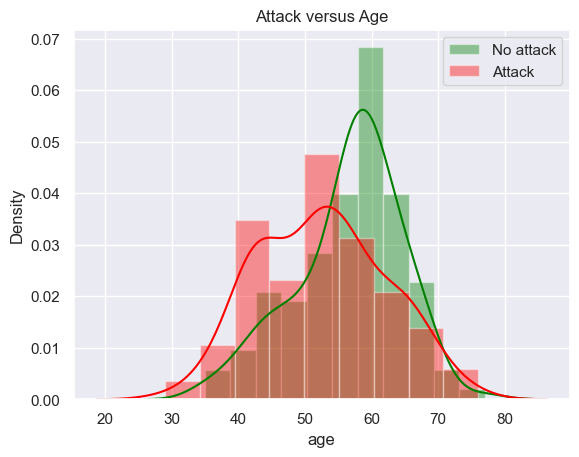

In [13]:
sns.distplot(df[df['output'] == 0]["age"], color='green', label='No attack')
sns.distplot(df[df['output'] == 1]["age"], color='red', label='Attack')
plt.title('Attack versus Age')
plt.legend()
plt.show()

so we can see in between 55 to 60 their is high risk of heart attack 

In [14]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x, y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

## Buliding the Model

In [15]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 12), (61, 12), (242,), (61,))

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
log_reg = LogisticRegression(max_iter=90)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7868852459016393

We have a accuracy of 85%. Let's predict and evaluate the output 

In [18]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

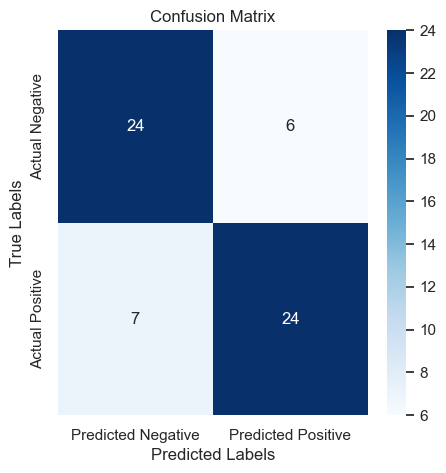

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

the model is created is shows the result as the 24 actual result is 24 positive and predicted also positive. same in negative their are 
24 negative result and model also showing that recors as a negative.

## Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7540983606557377

We have a accuracy of 75%. Let's predict and evaluate the output 

## Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.7377049180327869

We have a accuracy of 73%. Let's predict and evaluate the output 

<h1>K Nearest Neighbors </h1>

In [24]:
from sklearn.neighbors import KNeighborsClassifier
nearest = KNeighborsClassifier()
nearest.fit(X_train, y_train)
nearest.score(X_test, y_test)

0.7049180327868853

We have a accuracy of 70%. Let's predict and evaluate the output 

In [25]:
import pickle

In [27]:
with open ('Heart attack.pkl', 'wb') as file:
    pickle.dump(log_reg, file )